In [1]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf

2023-08-15 19:23:45.806223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import pathlib
from pathlib import Path
import glob

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
data_path="/Users/jordi/Desktop/FORMACION/CODE/phdUVa/videoandimus"
activities=['A01','A02','A03','A04','A05','A06','A07','A08','A09','A10','A11','A12','A13']
subjects=['S40','S41','S42','S44','S46','S47','S48','S49','S50','S51','S52','S53','S54','S55','S56','S57']
data =[]

In [5]:
for activity in activities:
    # for subject in os.listdir(data_path):
    for subject in subjects:
        if subject.startswith('S'):
            for filename in os.listdir(os.path.join(data_path, subject)):
                if filename.startswith(subject + '_'+ activity) and (filename.endswith('_T01.csv') or filename.endswith('_T02.csv')):
                    filepath = os.path.join(data_path, subject, filename)
                    # print(filepath)
                    df = pd.read_csv(filepath, header=0)
                    df['activity'] = activity
                    data.append(df)
dataset = pd.concat(data,ignore_index=True)

In [6]:
print(dataset['activity'].unique())

['A01' 'A02' 'A03' 'A04' 'A05' 'A06' 'A07' 'A08' 'A09' 'A10' 'A11' 'A12'
 'A13']


In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172456 entries, 0 to 172455
Columns: 103 entries, pelvis_x to activity
dtypes: float64(102), object(1)
memory usage: 135.5+ MB
None


In [8]:
print(dataset.describe())

            pelvis_x       pelvis_y       pelvis_z     left_hip_x  \
count  172456.000000  172456.000000  172456.000000  172456.000000   
mean      205.509019     188.883658    6165.026238     273.035671   
std       755.846594     168.758241     593.198508     760.135564   
min     -2114.100000    -207.800000       0.000000   -2028.800000   
25%        -4.300000      48.400000    5904.500000      76.300000   
50%       277.300000     131.800000    6230.600000     376.900000   
75%       472.800000     369.400000    6537.800000     549.400000   
max      2152.100000     513.500000    7581.000000    2246.600000   

          left_hip_y     left_hip_z    right_hip_x    right_hip_y  \
count  172456.000000  172456.000000  172456.000000  172456.000000   
mean      170.282121    6189.034165     138.228616     176.596824   
std       172.588425     591.042165     749.839565     176.004064   
min      -238.900000       0.000000   -2214.400000    -227.600000   
25%        25.800000    5929.4000

In [9]:
print(dataset.dtypes)

pelvis_x              float64
pelvis_y              float64
pelvis_z              float64
left_hip_x            float64
left_hip_y            float64
                       ...   
left_thumb_tip_z      float64
 right_thumb_tip_x    float64
 right_thumb_tip_y    float64
 right_thumb_tip_z    float64
activity               object
Length: 103, dtype: object


In [12]:
# Distribución de las muestras por actividad
print(dataset.shape)
print(dataset.groupby('activity').size())  

(172456, 103)
activity
A01    19082
A02    24372
A03    19936
A04    11827
A05    13298
A06    11358
A07    12778
A08    12493
A09    13637
A10     9045
A11     8757
A12     9073
A13     6800
dtype: int64


In [14]:
# Búsqueda de valores nulos en el dataset
null_cols = dataset.columns[dataset.isnull().any()]
dataset[null_cols].isnull().sum()
print(dataset[dataset.isnull().any(axis=1)][null_cols].head())

Empty DataFrame
Columns: []
Index: []


In [17]:
# MATRIZ DE CORRELACION
import seaborn as sns
import matplotlib.pyplot as plt
corr = dataset.corr()
corr=round(corr,3)
corr.style.background_gradient()

In [18]:
X=dataset.drop(columns=['activity']) # carga los valores de las muestras para todo el dataset
y=dataset['activity'] # carga las etiquetas de las muestras para todo el dataset

DIVISION DEL DATAFRAME EN TRAIN, TEST Y VALIDATION

Como se ha visto no existe una forma directa de dividir el conjunto de datos en tres. Pero es algo que se puede hacer fácilmente anidando los valores. Por ejemplo si tenemos tres valores que suman la unidad (train_size, validation_size, test_size) es posible dividir este un conjunto de datos entre de la siguiente manera:

En donde en primer lugar se ha calculado en porcentaje del conjunto de datos de test más validación que corresponde a validación. Así en una primera división se divide el conjunto original en uno de entrenamiento y otro de test y validación. Una vez hecho esto lo que se hace es dividir el conjunto en dos: uno de test y otro de validación.

In [19]:
from sklearn.model_selection import train_test_split

validation = 0.15 / (0.25 + 0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=validation)

In [20]:
print ('El conjunto TRAIN tiene ',X_train.shape[0], ' muestras y ',X_train.shape[1],' variables')
print ('El conjunto TEST tiene ',X_test.shape[0],' muestras y ',X_test.shape[1],' variables')
print ('El conjunto VALIDATION tiene ',X_val.shape[0],' muestras y ',X_val.shape[1],' variables')

El conjunto TRAIN tiene  120719  muestras y  102  variables
El conjunto TEST tiene  32336  muestras y  102  variables
El conjunto VALIDATION tiene  19401  muestras y  102  variables


PCA - REDUCCIÓN DE DIMENSIONES DEL DATASET ORIGINAL

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172456 entries, 0 to 172455
Columns: 103 entries, pelvis_x to activity
dtypes: float64(102), object(1)
memory usage: 135.5+ MB


In [22]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
dataset.mean(axis=0)

----------------------
Media de cada variable
----------------------


pelvis_x               205.509019
pelvis_y               188.883658
pelvis_z              6165.026238
left_hip_x             273.035671
left_hip_y             170.282121
                         ...     
left_thumb_tip_y        98.618012
left_thumb_tip_z      6057.175037
 right_thumb_tip_x     276.725650
 right_thumb_tip_y     122.823467
 right_thumb_tip_z    5975.824905
Length: 102, dtype: float64

In [23]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
dataset.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


pelvis_x              571304.073132
pelvis_y               28479.343787
pelvis_z              351884.469529
left_hip_x            577806.075809
left_hip_y             29786.764299
                          ...      
left_thumb_tip_y       74462.317320
left_thumb_tip_z      412799.080177
 right_thumb_tip_x    618860.859302
 right_thumb_tip_y     78168.437210
 right_thumb_tip_z    430983.456906
Length: 102, dtype: float64

PROCESO PCA

In [26]:
from sklearn.preprocessing import StandardScaler
from cv2 import eigen
sc = StandardScaler()
X_train_std = sc.fit_transform(X)

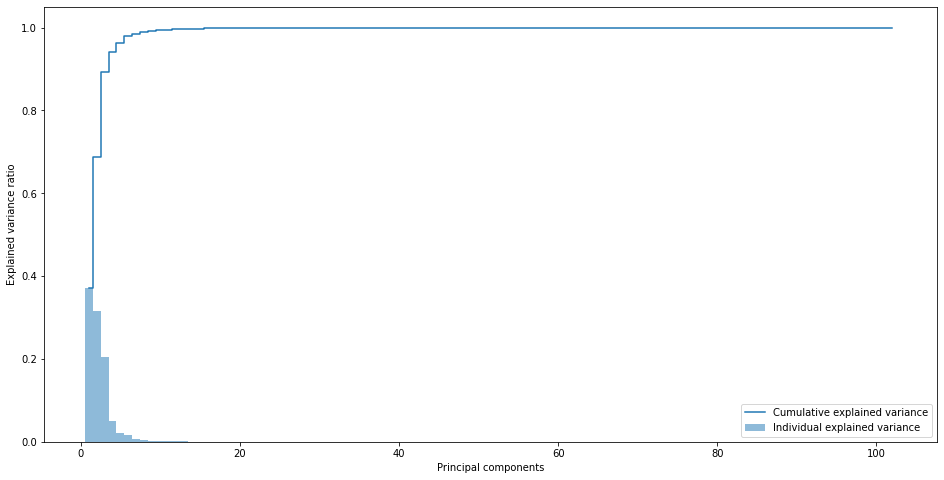

In [61]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(16,8))
plt.step(range(1,103), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.bar(range(1,103), var_exp, alpha=0.5, align='center', label='Individual explained variance',  width=1.0)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [62]:
eigen_pairs=[(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort()

In [63]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis],
               eigen_pairs[3][1][:, np.newaxis],
               eigen_pairs[4][1][:, np.newaxis],
               eigen_pairs[5][1][:, np.newaxis],))
X_train_std[0].dot(w)
X_train_pca = X_train_std.dot(w)

In [66]:
# Obtención conjunto de datos con reducción de dimensiones
from sklearn.decomposition import PCA


pca = PCA(n_components=6)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

In [67]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print(X_val_pca.shape)

(120719, 6)
(32336, 6)
(19401, 6)


In [70]:
# Localizar el índice de una columna en el dataset
indice_columna = dataset.columns.get_loc("left_knee_x")
print(indice_columna)

12


In [50]:
# Gráficos de línea para una actividad y sensor específicos (por ejemplo, actividad A01, sensor 0)
activity_data = dataset[dataset['activity'].str.contains('A01')]

In [51]:
activity_data

,pelvis_x,pelvis_y,pelvis_z,left_hip_x,left_hip_y,left_hip_z,right_hip_x,right_hip_y,right_hip_z,torso_x,...,right_index_knuckle_x,right_index_knuckle_y,right_index_knuckle_z,left_thumb_tip_x,left_thumb_tip_y,left_thumb_tip_z,right_thumb_tip_x,right_thumb_tip_y,right_thumb_tip_z,activity
0,1466.9,229.4,6657.7,1466.2,190.8,6576.7,1457.7,202.0,6739.7,1461.6,...,1470.5,326.2,6931.5,1402.5,381.9,6415.7,1466.2,338.0,6915.2,A01
1,1472.5,230.2,6683.8,1471.9,191.4,6602.4,1463.2,203.1,6766.3,1467.4,...,1475.1,328.0,6955.9,1406.7,383.2,6441.9,1470.7,339.8,6939.7,A01
2,1475.9,230.6,6700.3,1475.5,191.8,6618.5,1466.6,204.1,6783.1,1470.9,...,1477.9,330.5,6970.4,1408.3,383.9,6458.8,1473.3,342.3,6954.2,A01
3,1478.1,230.9,6711.0,1477.8,191.9,6629.1,1468.9,205.2,6794.2,1473.2,...,1478.9,332.9,6979.1,1408.7,384.2,6470.1,1474.2,344.6,6963.0,A01
4,1481.5,231.4,6726.2,1481.2,192.1,6644.1,1472.3,206.2,6809.7,1476.7,...,1481.5,335.4,6993.3,1410.7,384.7,6485.5,1476.7,347.0,6977.2,A01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19077,1743.6,147.4,6847.5,1767.5,128.4,6774.6,1705.0,139.9,6916.4,1736.1,...,1670.5,257.5,7018.0,1700.5,298.8,6668.9,1674.2,274.4,7003.0,A01
19078,1745.3,147.7,6855.7,1769.5,130.1,6782.8,1706.8,141.5,6924.7,1738.1,...,1673.0,258.3,7026.6,1703.6,301.4,6677.6,1676.5,275.5,7011.5,A01
19079,1743.7,147.6,6849.4,1767.8,130.4,6776.4,1705.3,141.6,6918.4,1736.6,...,1672.7,258.7,7020.0,1702.5,303.2,6671.9,1676.1,276.0,7004.8,A01
19080,1744.0,147.8,6849.7,1767.9,131.0,6776.7,1705.5,142.1,6918.8,1736.7,...,1675.7,259.2,7020.4,1704.5,305.5,6672.7,1678.8,276.5,7005.1,A01


In [71]:
sensor_0_data = activity_data.iloc[:, 12:15]  # Seleccionar columnas x
sensor_0_data

,left_knee_x,left_knee_y,left_knee_z
0,1481.5,663.2,6583.8
1,1487.4,663.7,6608.4
2,1491.4,663.0,6623.5
3,1494.0,661.5,6632.9
4,1497.7,660.0,6646.6
...,...,...,...
19077,1812.6,569.1,6798.9
19078,1815.2,569.7,6807.5
19079,1813.6,569.2,6801.2
19080,1813.8,569.5,6802.0


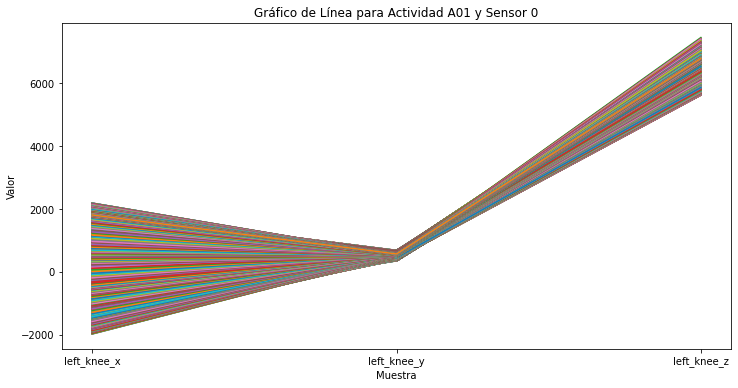

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(sensor_0_data.T)
plt.xlabel('Muestra')
plt.ylabel('Valor')
plt.title('Gráfico de Línea para Actividad A01 y Sensor 0')
plt.show()

### Proceso a seguir
La idea es crear un dataset que contenga la información correspondiente a cada actividad (comprobar número de filas por cada actividad) de los distintos sujetos y realizar la clasificación. Solo necesitamos leer los ficheros csv. Disponemos de 3 coordenadas (x, y, z) por cada articulación/hueso. 102 columnas: 36 articulaciones/puntos de observación.
Haremos un resumen del  contenido de cada fichero csv y será necesario generar un dataset con algún tipo de media/mediana o similar por columna para poder tipificar cada movimiento y clasificarlo.